## Load data

In [1]:
import sys
 
sys.path.insert(0, "../")

In [2]:
from dataAnalysis.data.Filter import Filter
import pandas as pd
from dataAnalysis.Constants import *
from dataAnalysis.DataAnalysis import DataAnalysis

data = pd.read_csv(r"../extdata/sbcdata.csv", header=0)
data_analysis = DataAnalysis(data, mimic_data = None)

/home/dwalke/git/sbc/machine_learning/../dataAnalysis/data/Filter.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['Label'] = self.data['Diagnosis']
/home/dwalke/git/sbc/machine_learning/../dataAnalysis/data/Filter.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['Label'] = self.data['Diagnosis']
/home/dwalke/git/sbc/machine_learning/../dataAnalysis/data/Filter.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [3]:
data = pd.concat((data_analysis.get_training_data(), data_analysis.get_testing_data()))
max_Id = data["Id"].unique().max()
gw_data = data_analysis.get_gw_testing_data().copy(deep=True)
gw_data = gw_data.assign(Id=lambda x: x.Id + max_Id)
data = pd.concat((data, gw_data))
data = data.sort_values("Id")
unique_ids = data["Id"].unique()
data = data.reset_index(drop=True)
data.pop("index")
data = data.sort_values(["Id", "Time"])
data = data.reset_index(drop=True)

In [4]:
from dataAnalysis.Constants import SEX_CATEGORY_COLUMN_NAME, SEX_COLUMN_NAME, FEATURES
data[SEX_CATEGORY_COLUMN_NAME] = data.loc[:, SEX_COLUMN_NAME] =="W"
data[SEX_CATEGORY_COLUMN_NAME] = data[SEX_CATEGORY_COLUMN_NAME].astype("int8")
data["Label"] = data["Label"] == "Sepsis"
data["Label"] = data["Label"].astype("int8")

In [5]:
data.describe()

,Id,Age,Episode,Time,SecToIcu,CRP,HGB,MCV,PCT,PLT,RBC,WBC,Label,SexCategory
count,1.819435e+06,1.819435e+06,1819435.0,1.819435e+06,9.529800e+04,1.160718e+06,1.819435e+06,1.819435e+06,45234.000000,1.819435e+06,1.819435e+06,1.819435e+06,1.819435e+06,1.819435e+06
mean,5.080331e+05,5.872990e+01,1.0,6.635706e+05,6.873870e+05,3.366954e+01,7.490981e+00,8.867748e+01,1.776924,2.410147e+02,4.064236e+00,8.407066e+00,1.354267e-03,4.949113e-01
std,2.821110e+05,1.831597e+01,0.0,1.754445e+06,1.673025e+06,5.404259e+01,1.505142e+00,6.291470e+00,12.526838,1.130200e+02,8.200045e-01,7.359161e+00,3.677544e-02,4.999742e-01
min,1.000000e+00,1.800000e+01,1.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-01,1.090000e+01,0.000000,0.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.616430e+05,4.600000e+01,1.0,0.000000e+00,2.189925e+04,3.010000e+00,6.400000e+00,8.500000e+01,0.080000,1.780000e+02,3.500000e+00,5.700000e+00,0.000000e+00,0.000000e+00
50%,5.229810e+05,6.100000e+01,1.0,6.552000e+04,1.366800e+05,1.010000e+01,7.700000e+00,8.850000e+01,0.140000,2.330000e+02,4.170000e+00,7.520000e+00,0.000000e+00,0.000000e+00
75%,7.698940e+05,7.300000e+01,1.0,6.505200e+05,6.587850e+05,4.006000e+01,8.600000e+00,9.220000e+01,0.430000,2.940000e+02,4.660000e+00,9.990000e+00,0.000000e+00,1.000000e+00
max,9.481210e+05,1.060000e+02,1.0,1.632744e+08,4.253190e+07,7.378600e+02,1.500000e+01,1.557000e+02,701.200000,3.354000e+03,9.400000e+00,9.516000e+02,1.000000e+00,1.000000e+00


In [23]:
data[data["Id"] == 948120]

,Id,Age,Sex,Diagnosis,Center,Set,Sender,Episode,Time,TargetIcu,SecToIcu,CRP,HGB,MCV,PCT,PLT,RBC,WBC,Label,SexCategory
1819428,948120,56,M,Control,Greifswald,Validation,ED,1,0.0,NaN,NaN,24.4,10.1,89.0,NaN,236.0,5.4,8.12,0,0
1819429,948120,56,M,Control,Greifswald,Validation,GEN,1,74640.0,NaN,NaN,52.0,9.9,89.2,NaN,219.0,5.4,7.00,0,0
1819430,948120,56,M,Control,Greifswald,Validation,GEN,1,118380.0,NaN,NaN,NaN,8.7,88.1,NaN,200.0,4.7,6.20,0,0
1819431,948120,56,M,Control,Greifswald,Validation,GEN,1,168660.0,NaN,NaN,95.0,8.7,88.4,NaN,233.0,4.7,6.92,0,0
1819432,948120,56,M,Control,Greifswald,Validation,GEN,1,340440.0,NaN,NaN,63.6,8.1,87.6,NaN,225.0,4.5,3.70,0,0


In [6]:
data_new = data[['Id', 'Age', 'Episode', 'Time', 'HGB', 'MCV', 'PLT', 'RBC', 'WBC', 'Label', 'SexCategory']]

In [7]:
data_new = data_new.copy(deep=True)

## Smoothing features along time

In [8]:
# from tqdm.notebook import tqdm
# for Id, group in tqdm(data_new.groupby("Id")):
#     sepsis_group = group[group["Label"] == 1]
#     control_group = group[group["Label"] == 0]
    
#     if sepsis_group.shape[0] > 1:
#         sepsis_mean = sepsis_group.mean(numeric_only = True)
#         for idx in sepsis_group.index:
#             data_new.iloc[idx] = sepsis_mean
#     if control_group.shape[0] > 1:
#         control_mean = control_group.mean(numeric_only = True)
#         for idx in control_group.index:
#             data_new.iloc[idx] = control_mean

In [9]:
data_new = pd.read_csv("../extdata/sbcdata_smooothened.csv")

In [10]:
data_new = data_new.sample(frac=1).reset_index(drop=True)

In [11]:
data_new["Center"] = data["Center"]
data_new["Set"] = data["Set"]

In [13]:
import numpy as np
y_train = data_new[np.logical_and(data_new["Set"] =="Training", data_new["Center"] =="Leipzig")]["Label"].values
X_train = data_new[np.logical_and(data_new["Set"] =="Training", data_new["Center"] =="Leipzig")][FEATURES].values

y_test = data_new[np.logical_and(data_new["Set"] =="Validation", data_new["Center"] =="Leipzig")]["Label"].values
X_test = data_new[np.logical_and(data_new["Set"] =="Validation", data_new["Center"] =="Leipzig")][FEATURES].values

y_gw_test = data_new[np.logical_and(data_new["Set"] =="Validation", data_new["Center"] =="Greifswald")]["Label"].values
X_gw_test = data_new[np.logical_and(data_new["Set"] =="Validation", data_new["Center"] =="Greifswald")][FEATURES].values

## Metrics definition

In [14]:
from dataAnalysis.Metrics import Evaluation

evaluation = Evaluation(y_test, y_gw_test, X_test, X_gw_test)
# evaluation_ed = Evaluation(y_test_ed, y_test_ed_gw, X_test_ed, X_test_ed_gw)

In [15]:
from sklearn.metrics import precision_recall_curve
def print_prc(classifier, y_test = y_test):
    y_score = classifier.predict_proba(X_test)[:, 1]
    #calculate precision and recall
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)

    #create precision recall curve
    fig, ax = plt.subplots()
    ax.plot(recall, precision, color='purple')

    #add axis labels to plot
    ax.set_title('Precision-Recall Curve')
    ax.set_ylabel('Precision')
    ax.set_xlabel('Recall')

    #display plot
    plt.show()

## Logistic regression

9.253026485443115
         Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0     Leipzig  0.045132  0.779949  0.442761   0.009292  0.830424  0.011188
1  Greifswald  0.043813  0.780637  0.442790   0.008911  0.825150  0.011666


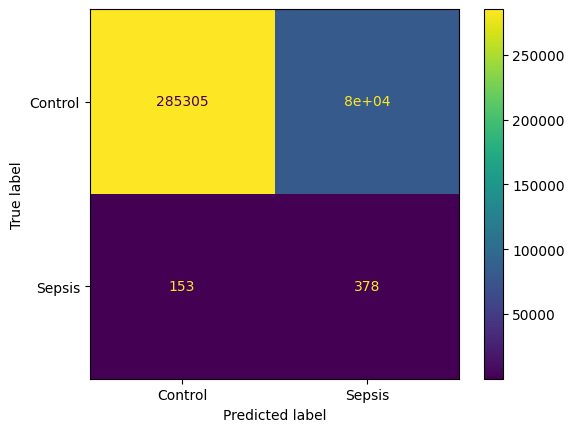

In [17]:
from sklearn.linear_model import LogisticRegression
import time
start = time.time()
logistic_regression = LogisticRegression(random_state=0, solver="liblinear", class_weight="balanced")
logistic_regression.fit(X_train, y_train)
print(time.time() -start)
print(evaluation.get_df_metrics(logistic_regression))
# print(evaluation_ed.get_df_metrics(logistic_regression))
evaluation.plot_confusion_matrix(logistic_regression)

## Decision Tree

5.476520538330078
         Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0     Leipzig  0.049584  0.799311  0.449337   0.010340  0.833661  0.011002
1  Greifswald  0.050347  0.799362  0.449296   0.010225  0.847219  0.010773


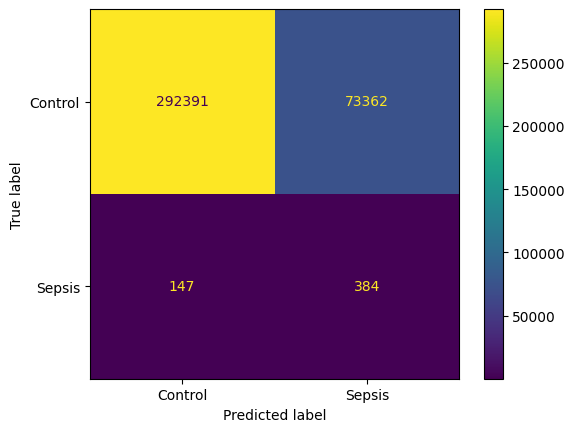

In [18]:
from sklearn.tree import DecisionTreeClassifier
start = time.time()
decision_tree = DecisionTreeClassifier(random_state=42, max_features=6, min_samples_leaf=0.005,
                       min_samples_split=0.03, class_weight="balanced")
decision_tree.fit(X_train, y_train)
print(time.time() -start)
print(evaluation.get_df_metrics(decision_tree))
evaluation.plot_confusion_matrix(decision_tree)

## Random Forest

36.946463108062744
         Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0     Leipzig  0.080562  0.927698  0.493387   0.024316  0.880935  0.022497
1  Greifswald  0.083835  0.928081  0.493714   0.024763  0.892254  0.025459
[0.09653746 0.00964148 0.0797795  0.54384227 0.06577552 0.04693541
 0.15748836]


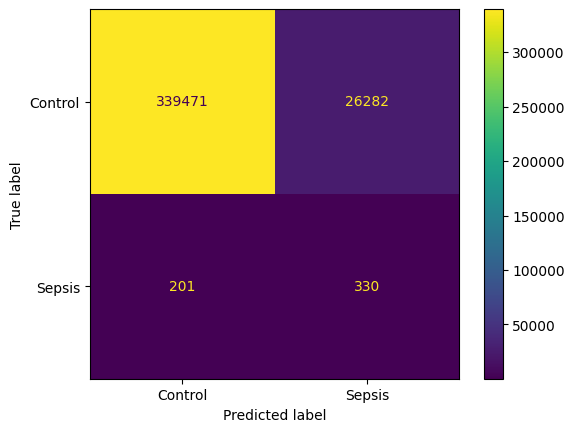

In [19]:
from sklearn.ensemble import RandomForestClassifier
import time
start = time.time()
random_forest = RandomForestClassifier(class_weight={0: 0.0025, 1: 1}, max_leaf_nodes=79,
                           min_samples_leaf=0.0001,
                           min_samples_split=0.0055,
                           n_estimators=500, random_state=42, n_jobs=-1)
random_forest.fit(X_train, y_train)
print(time.time() -start)
print(evaluation.get_df_metrics(random_forest))
# print(evaluation_ed.get_df_metrics(logistic_regression))
evaluation.plot_confusion_matrix(random_forest)
print(random_forest.feature_importances_)

## XG Boost

10.37796425819397
         Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0     Leipzig  0.112816  0.987209  0.532459   0.071358  0.916973  0.040504
1  Greifswald  0.121234  0.987064  0.534131   0.074776  0.919930  0.045076


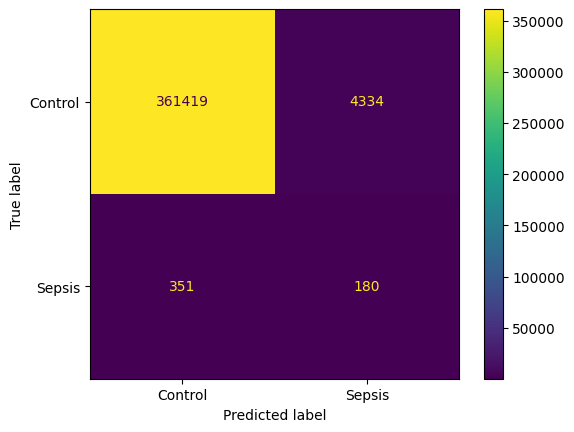

In [20]:
from xgboost import XGBClassifier

start = time.time()
# xgb_classifier = XGBClassifier(tree_method='gpu_hist', 
#                            scale_pos_weight = 660,
#                            n_estimators=478,
#                            max_depth=2,
#                            eta=0.1,
#                            min_child_weight = 7,
#                            max_delta_step= 7,
#                            sampling_method= "uniform")
xgb_classifier = XGBClassifier(tree_method='gpu_hist', 
                           scale_pos_weight = 70,
                           n_estimators=1000,
                           max_depth=2,
                           eta=0.1,
                           min_child_weight = 7,
                           max_delta_step= 7,
                           sampling_method= "uniform")
xgb_classifier.fit(X_train, y_train)
print(time.time() -start)
print(evaluation.get_df_metrics(xgb_classifier))
evaluation.plot_confusion_matrix(xgb_classifier)

## RUS Boost

/home/dwalke/.local/lib/python3.10/site-packages/imblearn/ensemble/_weight_boosting.py:271: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


141.51515698432922
         Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0     Leipzig  0.069688  0.886203  0.478131   0.016656  0.888801  0.042837
1  Greifswald  0.045280  0.836611  0.459751   0.008533  0.845496  0.016384


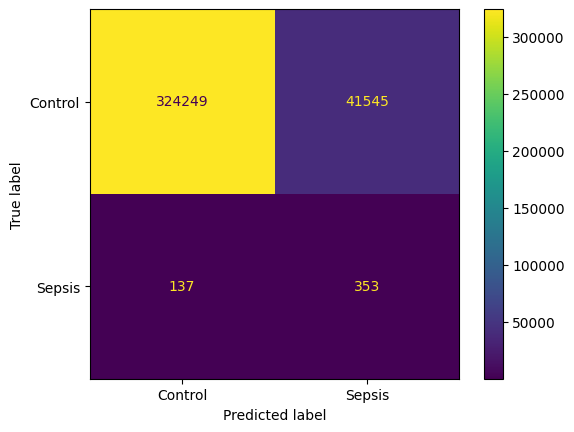

In [217]:
from imblearn.ensemble import RUSBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import time
start = time.time()
rus_boost = RUSBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=79, min_samples_leaf= 5, min_samples_split = 10),
                   learning_rate=0.90369, n_estimators=495,
                   random_state=1714400672, sampling_strategy=35/65)
rus_boost.fit(X_train, y_train)
print(time.time() -start)
print(evaluation.get_df_metrics(rus_boost))
evaluation.plot_confusion_matrix(rus_boost)